<a href="https://colab.research.google.com/github/mykon23/AI-2020/blob/master/Activities/Activity10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regression using Neural Networks and Evaluation

In [1]:
!wget -O Baseball.csv https://github.com/mykon23/AI-2020/blob/master/Data/Baseball.csv?raw=True

--2020-09-21 00:42:57--  https://github.com/mykon23/AI-2020/blob/master/Data/Baseball.csv?raw=True
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mykon23/AI-2020/raw/master/Data/Baseball.csv [following]
--2020-09-21 00:42:57--  https://github.com/mykon23/AI-2020/raw/master/Data/Baseball.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Baseball.csv [following]
--2020-09-21 00:42:57--  https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Baseball.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 20

##Defind Data for OPS

In [2]:
import pandas as pd
data = pd.read_csv('Baseball.csv', delimiter=',')
data.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


Acquire OPS (On Base Percentage Plus Slugging) which is sum of OBP and SLG

In [3]:
import numpy as np

##Get the features of interest
features = ['RS', 'RA', 'W']
output = ['OBP', 'SLG']

##Get the features from the dataset
X = data [ features ].to_numpy().astype(np.float64)
##Construct OPS which is the sum of OBP and SLG
Y = data [ output ].to_numpy().astype(np.float).sum(axis = 1)

In [4]:
##Standardization
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis = 0)
X /= std

##Build a Neural Network

Define the Neural Network and Utility Functions

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

##Define variables for evaluation
mae = {}
predict = {}

##Returns the defined architecture for the Neural Network 
def get_neural_network(x):
  model = Sequential()
  model.add( Dense(4, input_dim = len(x), activation='relu') )
  model.add( Dense(1, activation='relu'))
  return model

##Returns the architecture for the Regression Model
def get_regression_model(x):
  return Sequential( Dense(1, input_dim = len(X[0]), activation='linear') )

##Displays the scatter plot between the true values and the predicted values
def display_scatter(y, predict):
  plt.scatter(y, predict)
  plt.xlabel('True OPS')
  plt.ylabel('Predicted OPS')
  plt.plot([0.55, 0.9], [0.55, 0.9], color = 'red')
  plt.show()

##Gets the Mean Average Error between the true values and the predictions
def get_mae(y, predict):
  stats = {}
  diff = abs( y - predict )
  stats['mae'] = diff.mean()
  stats['std'] = diff.std()
  return stats

##Display the metrics
def display_metrics(metrics):
  for k in sorted(metrics.keys()):
    print(f'{k:8s} {metrics[k]:2f}')

Model to use MSE as loss function

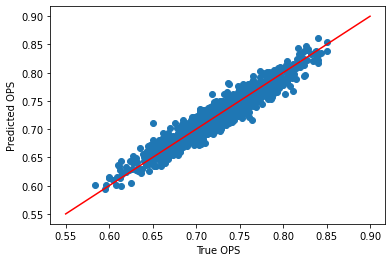

mae      0.010713
std      0.008041


In [6]:
##Train the model
loss = 'mse'
nn_model = get_neural_network(X[0])
nn_model.compile(loss = loss, optimizer= 'rmsprop', metrics=['mse'])
nn_model.fit(X, Y, epochs = 256, verbose= 0)

##Get the predictions
predict[loss] = nn_model.predict(X).flatten()

##Display the scatter plot
display_scatter(Y, predict[loss])

##Get the mean absolute error
mae[loss] = get_mae(Y, predict[loss])
display_metrics(mae[loss])

The model yields a linear relationship between the true values and the predicted values with minimal variance observed on the neural network.  These assessments are made based on successful training.  It was observed that the performance of the model is highly sensitive to the starting point as a poor starting point causes divergence.  A successful training execution yields a solution that does not have a bias.

##Build a Regression Model

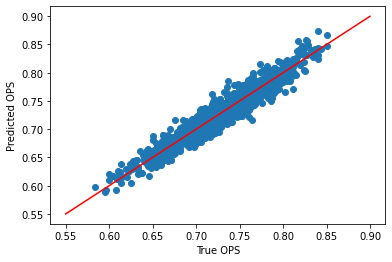

mae      0.010597
std      0.008173


In [7]:
##Train the model
reg_model = get_regression_model(X[0])
reg_model.compile(loss='mse', optimizer='rmsprop', metrics = ['mse'])
reg_model.fit(X, Y, epochs = 256, verbose = 0)

##Get the predictions
predict['reg'] = reg_model.predict(X).flatten()

##Display the scatter plot
display_scatter(Y, predict['reg'])

##Get the mean absolute error
mae['reg'] = get_mae(Y, predict['reg'])
display_metrics(mae['reg'])

##Compare Neural Network vs Regression Model

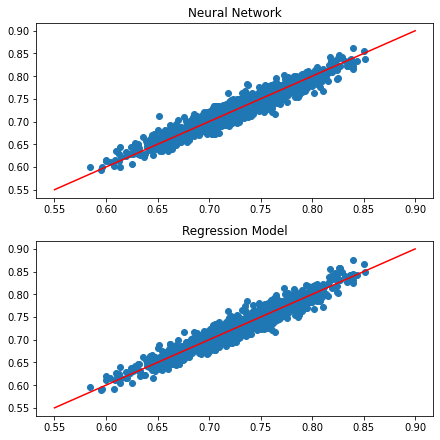

In [8]:
axs = plt.figure(figsize=(6,6), constrained_layout = True).subplots(2,1)
titles = ['Neural Network', 'Regression Model']
models = ['mse', 'reg']

for i in range(len(titles)):
  axs[i].set_title(titles[i])
  axs[i].scatter(Y, predict[ models[i] ])
  axs[i].plot([0.55, 0.9], [0.55, 0.9], color = 'red')


In [9]:
##Compare the metrics between the Neural Network and the Regression Model
print(f'{"":8s} {"NN":8s} {"Reg":8s}')

for k in sorted(mae['reg'].keys()):
  print(f'{k:8s} {mae["mse"][k]:2f} {mae["reg"][k]:2f}')

         NN       Reg     
mae      0.010713 0.010597
std      0.008041 0.008173


The Mean Average Error of the nerual network is comparable to that of a regression model with the regression model outperforming the neural network.  The neural network outperforms the regression model in terms of variations.  The performance of the neural network is dependent on whether a good set initial set parameters are set on model construction.

##Observe Effects of Loss Function

Model with Mean Average Error Loss Function

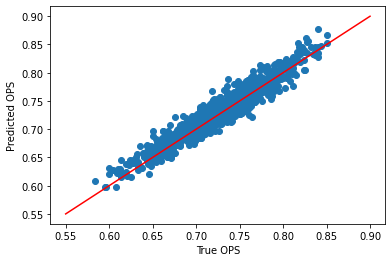

mae      0.010752
std      0.008580


In [10]:
##Train the model
loss = 'mae'
nn_model = get_neural_network(X[0])
nn_model.compile(loss = loss, optimizer= 'rmsprop', metrics=['mse'])
nn_model.fit(X, Y, epochs = 256, verbose= 0)

##Get the predictions
predict[loss] = nn_model.predict(X).flatten()

##Display the scatter plot
display_scatter(Y, predict[loss])

##Get the mean absolute error
mae[loss] = get_mae(Y, predict[loss])
display_metrics(mae[loss])

Model with Mean Squared Logarithmetic Error Loss Function

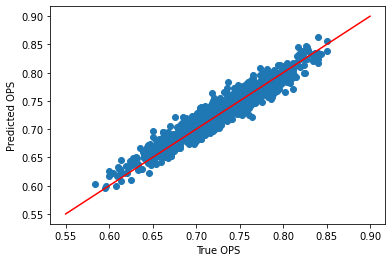

mae      0.010488
std      0.008068


In [11]:
##Train the model
loss = 'mean_squared_logarithmic_error'
nn_model = get_neural_network(X[0])
nn_model.compile(loss = loss, optimizer= 'rmsprop', metrics=['mse'])
nn_model.fit(X, Y, epochs = 256, verbose= 0)

##Get the predictions
predict[loss] = nn_model.predict(X).flatten()

##Display the scatter plot
display_scatter(Y, predict[loss])

##Get the mean absolute error
mae[loss] = get_mae(Y, predict[loss])
display_metrics(mae[loss])

Model with LogCosh Loss Function

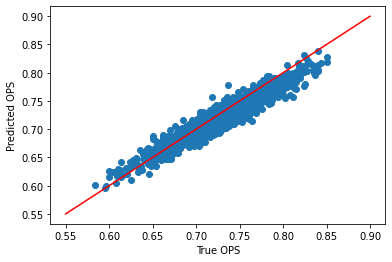

mae      0.012777
std      0.009331


In [12]:
##Train the model
loss = 'logcosh'
nn_model = get_neural_network(X[0])
nn_model.compile(loss = loss, optimizer= 'rmsprop', metrics=['mse'])
nn_model.fit(X, Y, epochs = 256, verbose= 0)

##Get the predictions
predict[loss] = nn_model.predict(X).flatten()

##Display the scatter plot
display_scatter(Y, predict[loss])

##Get the mean absolute error
mae[loss] = get_mae(Y, predict[loss])
display_metrics(mae[loss])

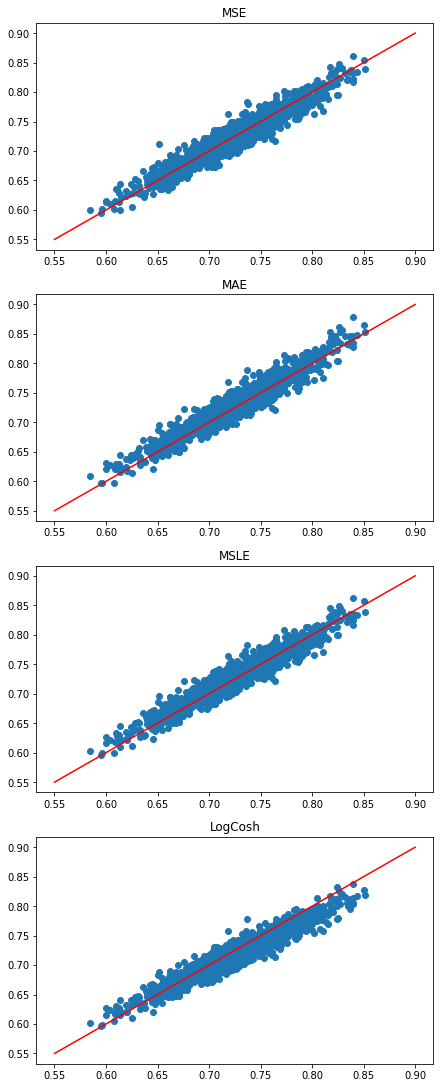

In [15]:
axs = plt.figure(figsize=(6,15), constrained_layout = True).subplots(4,1)
titles = ['MSE', 'MAE', 'MSLE', 'LogCosh']
models = ['mse', 'mae', 'mean_squared_logarithmic_error', 'logcosh']

for i in range(len(titles)):
  axs[i].set_title(titles[i])
  axs[i].scatter(Y, predict[ models[i] ])
  axs[i].plot([0.55, 0.9], [0.55, 0.9], color = 'red')

In [14]:
print(f'{"":8s} {"MSE":8s} {"MAE":8s} {"MSLE":8s} {"Logcosh":8s}')

for k in sorted(mae['reg'].keys()):
  print(f'{k:8s} {mae["mse"][k]:2f} {mae["mae"][k]:2f} {mae["mean_squared_logarithmic_error"][k]:2f} {mae["logcosh"][k]:2f}')

         MSE      MAE      MSLE     Logcosh 
mae      0.010713 0.010752 0.010488 0.012777
std      0.008041 0.008580 0.008068 0.009331


The neural network yields a linear relationship between the predicted values and the true values of OPS regardless of the loss function.  Mean sqaured logarithm error yields the smallest mean average error in this iteration followed by mean square error.  The variations between the predicted values and the true values were minimal when the mean squared error was utilized as the loss function.  Further observations should focus on using some sort of mean square error as the mean average and logcosh did not perform well in comparison.  The metrics may also be attributed to the initial values of the model as the convergence of the model is dependent on a good starting point.